<a href="https://colab.research.google.com/github/gasoares23/IC/blob/main/Rhaul_Gabi_G2(GA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-opt

best_x: [ 5.69562456  9.999872    1.99379627  9.9992574  -0.44974622  0.88147235
  1.78512876] 
 best_y: [257.16643061]


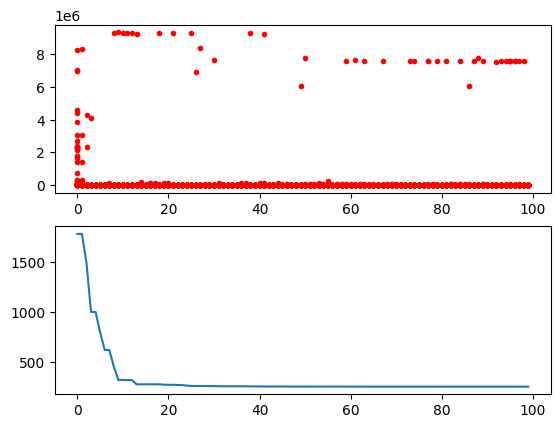

In [ ]:
import random
import numpy as np

# Define the objective function
def objective_function(x):
 x1, x2, x3, x4, x5, x6, x7 = x
 return (x1 - 10)**2 + 5*(x2 - 12)**2 + x3**4 + 3*(x4 - 11)**2 + 10*(x5**6) + 7*(x6**2) + x7**4 - 4*x6*x7 - 10*x6 - 8*x7

# Define the constraints
def restricao1(x):
 x1, x2, x3, x4, x5, x6, x7 = x
 return 127 - 2*(x1**2) - 3*(x2**4) - x3 - 4*(x4**2) - 5*(x5)
def restricao2(x):
 x1, x2, x3, x4, x5, x6, x7 = x
 return 282 - 7*(x1) - 3*(x2) - 10*(x3**2) - x4 + x5
def restricao3(x):
 x1, x2, x3, x4, x5, x6, x7 = x
 return 196 - 23*(x1) - x2**2 - 6*(x6**2) + 8*(x7)
def restricao4(x):
 x1, x2, x3, x4, x5, x6, x7 = x
 return 4*(x1**2) + x2**2 - 3*x1*x2 + 2*(x3**2) + 5*(x6) - 11*(x7)

# Define the penalty function
def penalty_function(x):
 return max(0, restricao1(x)) + max(0, restricao2(x)) + max(0, restricao3(x)) + max(0,
restricao4(x))

def fitness_function(x):
 return objective_function(x) + penalty_function(x)
import numpy as np
from sko.GA import GA
ga = GA(func=fitness_function, n_dim=7, size_pop=50, max_iter=100, prob_mut=0.01, lb=[-10,
-10, -10, -10, -10, -10, -10], ub=[10, 10, 10, 10, 10, 10, 10], precision=1e-7)
best_x, best_y = ga.run()
print('best_x:', best_x, '\n', 'best_y:', best_y)

import pandas as pd
import matplotlib.pyplot as plt
Y_history = pd.DataFrame(ga.all_history_Y)
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()